In [1]:
%load_ext autoreload
%autoreload 2
from glob import glob
import os
from pathlib import Path
import re
import sys
import yaml
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
from func.utils import get_categorical_features, read_pkl_gzip, to_pkl_gzip, parallel_load_data, get_filename, logger_func
from ieee_train import eval_train, eval_check_feature
from kaggle_utils import reduce_mem_usage, move_feature
logger = logger_func()

2019-09-30 12:39:28,709 func.utils 347 [INFO]    [logger_func] start 


In [2]:
COLUMN_ID = 'TransactionID'
COLUMN_DT = 'TransactionDT'
COLUMN_TARGET = 'isFraud'
COLUMN_GROUP = 'DT-M'
COLUMNS_IGNORE = [COLUMN_ID, COLUMN_DT, COLUMN_TARGET, COLUMN_GROUP, 'is_train', 'date']

def filter_feature(path):
    if path.count(''):
        return True
    else:
        return False

paths_train = glob('../submit/re_sub/*_train.gz')
paths_test  = glob('../submit/re_sub/*_test.gz')
# paths_train = glob('../submit/re_sub/50*_train.gz')
# paths_test  = glob('../submit/re_sub/50*_test.gz')
# paths_train += glob('../submit/re_sub/is*_train.gz')
# paths_test  += glob('../submit/re_sub/is*_test.gz')
# paths_train += glob('../submit/re_sub/Tran*_train.gz')
# paths_test  += glob('../submit/re_sub/Tran*_test.gz')
# paths_train += glob('../feature/valid_use/534*_train.gz')
# paths_test  += glob('../feature/valid_use/534*_test.gz')
# paths_train += glob('../feature/valid_use/535*_train.gz')
# paths_test  += glob('../feature/valid_use/535*_test.gz')
# paths_train += glob('../feature/valid_use/536*_train.gz')
# paths_test  += glob('../feature/valid_use/536*_test.gz')
# paths_train += glob('../feature/valid_use/703*_train.gz')
# paths_test  += glob('../feature/valid_use/703*_test.gz')
# paths_train += glob('../feature/valid_use/704*_train.gz')
# paths_test  += glob('../feature/valid_use/704*_test.gz')

print(len(paths_train))
# sys.exit()
# paths_train += glob('../feature/valid_trush/528*uid2*_train.gz')
# paths_test  += glob('../feature/valid_trush/528*uid2*_test.gz')

# for path in paths_train:
#     if path.count('C14_ratio'):
#         paths_train.remove(path)
        
# for path in paths_test:
#     if path.count('C14_ratio'):
#         paths_test.remove(path)
    
# paths_train = glob('../feature/raw_use/*_train.gz')
# paths_test = glob('../feature/raw_use/*_test.gz')
# paths_train = [path for path in paths_train if filter_feature(path) ]
# paths_test = [path for path in paths_test if filter_feature(path) ]

# paths_train_feature = sorted(glob('../feature/org_use/*_train.gz'))
# paths_test_feature  = sorted(glob('../feature/org_use/*_test.gz'))

# paths_train_feature += sorted(glob('../feature/valid/*_train.gz'))
# paths_test_feature  += sorted(glob('../feature/valid/*_test.gz'))

# paths_train_feature += sorted(glob('../feature/kernel/*_train.gz'))
# paths_test_feature  += sorted(glob('../feature/kernel/*_test.gz'))

# paths_train_feature = sorted(glob('../feature/valid_use/*_train.gz'))
# paths_test_feature  = sorted(glob('../feature/valid_use/*_test.gz'))
paths_train_feature = []
paths_test_feature  = []

# df_train = reduce_mem_usage( parallel_load_data(paths_train) )
# df_test  = reduce_mem_usage( parallel_load_data(paths_test) )
df_train = parallel_load_data(paths_train)
df_test  = parallel_load_data(paths_test)
Y = df_train[COLUMN_TARGET]
df_train.drop(COLUMN_TARGET, axis=1, inplace=True)

1080


In [3]:
# list_path  = glob('../submit/add_feature/20190930*.gz')
# for path in tqdm(list_path):
#     fname = get_filename(path, delimiter='gz')
#     fname = re.search(r'__([^/.]*)__all_preds', fname).group(1)
#     fname = re.search(r'__([^/.]*)', fname).group(1)
#     feature = read_pkl_gzip(path).iloc[:, 1]
#     df_train[f'oof_pred_diff_{fname}'] = df_train[fname].values - feature.iloc[:len(df_train)]
#     df_test[ f'oof_pred_diff_{fname}'] = df_test[ fname].values - feature.iloc[len(df_train):]

2019-09-30 12:39:56,332 func.utils 108 [INFO]    [<module>] * EXP: dataset new_set (590540, 1080) lr 0.01  


  * Diff Features: 0
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.911774
[400]	valid_0's auc: 0.924226
[600]	valid_0's auc: 0.930586
[800]	valid_0's auc: 0.933852
[1000]	valid_0's auc: 0.935534
[1200]	valid_0's auc: 0.936498
[1400]	valid_0's auc: 0.937064
[1600]	valid_0's auc: 0.937552
[1800]	valid_0's auc: 0.937867
[2000]	valid_0's auc: 0.938003
Early stopping, best iteration is:
[2066]	valid_0's auc: 0.938109


2019-09-30 12:49:04,177 func.utils 169 [INFO]    [ieee_cv]   * Fold0 2017-12: 0.938108572579307 | Bear's...PB:0.9825624411394802 PV:0.9803936616975816 All:0.9810373990544772 


[  * Fold0 Validation-DT-M 2017-12: 134339] done in 542 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.940167
[400]	valid_0's auc: 0.950959
[600]	valid_0's auc: 0.956141
[800]	valid_0's auc: 0.958255
[1000]	valid_0's auc: 0.959197
[1200]	valid_0's auc: 0.95957
Early stopping, best iteration is:
[1191]	valid_0's auc: 0.959594


2019-09-30 12:52:46,611 func.utils 169 [INFO]    [ieee_cv]   * Fold1 2018-3: 0.9595937182519938 | Bear's...PB:0.9748157138734468 PV:0.9764914271881107 All:0.9760363159084309 


[  * Fold1 Validation-DT-M 2018-3: 101968] done in 220 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.938248
[400]	valid_0's auc: 0.95266
[600]	valid_0's auc: 0.959358
[800]	valid_0's auc: 0.962253
[1000]	valid_0's auc: 0.963606
[1200]	valid_0's auc: 0.964477
[1400]	valid_0's auc: 0.964993
[1600]	valid_0's auc: 0.965377
[1800]	valid_0's auc: 0.96572
[2000]	valid_0's auc: 0.965857
Early stopping, best iteration is:
[1901]	valid_0's auc: 0.965877


2019-09-30 13:03:30,852 func.utils 169 [INFO]    [ieee_cv]   * Fold2 2018-1: 0.9658771831415629 | Bear's...PB:0.9818249403526941 PV:0.9804326928137137 All:0.9807941103682227 


[  * Fold2 Validation-DT-M 2018-1: 92510] done in 641 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.934844
[400]	valid_0's auc: 0.945687
[600]	valid_0's auc: 0.950485
[800]	valid_0's auc: 0.952727
[1000]	valid_0's auc: 0.953693
[1200]	valid_0's auc: 0.954257
[1400]	valid_0's auc: 0.954545
[1600]	valid_0's auc: 0.954704
Early stopping, best iteration is:
[1616]	valid_0's auc: 0.954772


2019-09-30 13:09:20,921 func.utils 169 [INFO]    [ieee_cv]   * Fold3 2018-5: 0.9547716098119029 | Bear's...PB:0.9470127655329423 PV:0.9486122464731659 All:0.9489980731401911 


[  * Fold3 Validation-DT-M 2018-5: 92427] done in 346 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.94947
[400]	valid_0's auc: 0.959929
[600]	valid_0's auc: 0.964166
[800]	valid_0's auc: 0.965695
[1000]	valid_0's auc: 0.966442
[1200]	valid_0's auc: 0.966733
[1400]	valid_0's auc: 0.967125
[1600]	valid_0's auc: 0.967182
Early stopping, best iteration is:
[1567]	valid_0's auc: 0.967221


2019-09-30 13:18:32,435 func.utils 169 [INFO]    [ieee_cv]   * Fold4 2018-2: 0.967220974897681 | Bear's...PB:0.982237038215842 PV:0.97873023446737 All:0.9799257491648374 


[  * Fold4 Validation-DT-M 2018-2: 85725] done in 548 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.947989
[400]	valid_0's auc: 0.960668
[600]	valid_0's auc: 0.965976
[800]	valid_0's auc: 0.968331
[1000]	valid_0's auc: 0.969458
[1200]	valid_0's auc: 0.970254
[1400]	valid_0's auc: 0.970599
[1600]	valid_0's auc: 0.970922
[1800]	valid_0's auc: 0.97105
[2000]	valid_0's auc: 0.971073
Early stopping, best iteration is:
[1905]	valid_0's auc: 0.971104


2019-09-30 13:23:48,408 func.utils 169 [INFO]    [ieee_cv]   * Fold5 2018-4: 0.9711037519965346 | Bear's...PB:0.9770531558739384 PV:0.9723383410109148 All:0.9741094560997219 


[  * Fold5 Validation-DT-M 2018-4: 83571] done in 313 s


2019-09-30 13:24:37,379 func.utils 355 [INFO]    [eval_train] * CV: 0.959445968446497 | BestIter: 1707.6666666666665 


[  * Make Prediction Result File.] done in 47 s
* Check Corr with Past Submit.
* Training Feature Importance


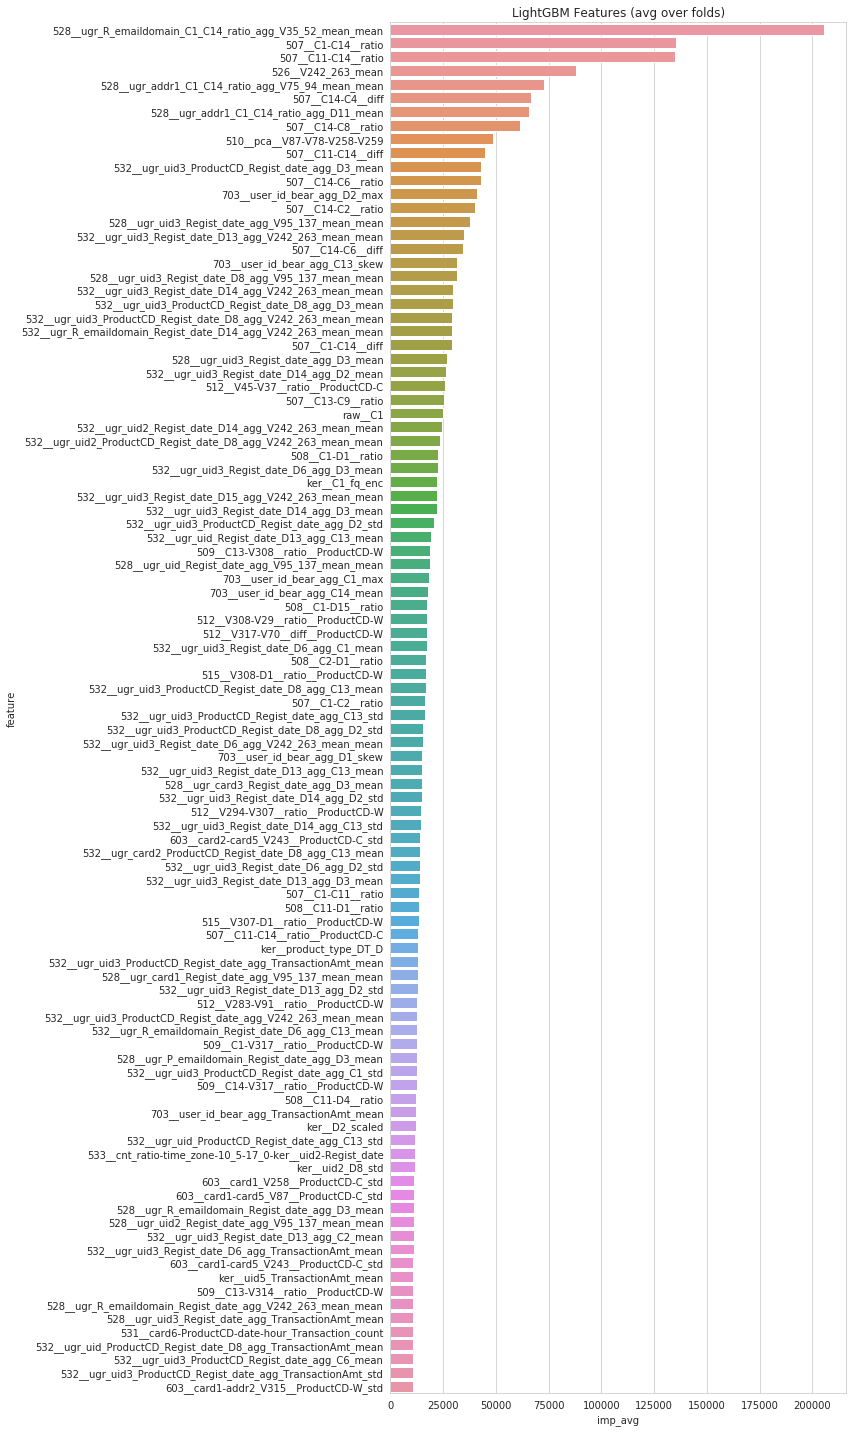

UnboundLocalError: local variable 'adv_cv_score' referenced before assignment

In [4]:
is_submit = [True, False][0]
n_splits = 6
set_type = 'new_set'

valid_paths_train = paths_train_feature[:]
valid_paths_test  = paths_test_feature[:]

#========================================================================
# pathの存在チェック。なぜかたびたびFileNotFoundErrorが起きるので,,,
#========================================================================
remove_paths = []
for trn_path, tes_path in zip(valid_paths_train, valid_paths_test):
    if os.path.exists(trn_path) and os.path.exists(tes_path):
        pass
    else:
        remove_paths.append(trn_path)
        remove_paths.append(tes_path)
for path in remove_paths:
    if path.count('train'):
        valid_paths_train.remove(path)
        print(f'remove {path}')
    elif path.count('test'):
        valid_paths_test.remove(path)
        print(f'remove {path}')

if len(valid_paths_train):
    df_feat_train = parallel_load_data(valid_paths_train)
    df_feat_test  = parallel_load_data(valid_paths_test)
    
    col_drops = eval_check_feature(df_feat_train, df_feat_test)
    
    tmp_train = df_train.join(df_feat_train)
    tmp_test = df_test.join(df_feat_test)
else:
    tmp_train = df_train
    tmp_test = df_test

#========================================================================
# Train Test で片方に存在しないFeatureを除外
#========================================================================
diff_cols = list(set(tmp_train.columns) - set(tmp_test.columns))

for col in list(set(diff_cols)):
    from_dir = 'valid'
    to_dir = 'valid_trush'
    move_feature([col], from_dir, to_dir)
tmp_train.drop(diff_cols, axis=1, inplace=True)
print(f"  * Diff Features: {len(diff_cols)}")

# same_user_path = '../output/same_user_pattern/20190901_user_ids_share.csv'
# same_user_path = '../output/same_user_pattern/0902__same_user_id__card_addr_pemail_M.csv'

### DT-M
group_kfold_path = '../input/0908_ieee__DT-M_GroupKFold.gz'
group = read_pkl_gzip(group_kfold_path)
tmp_train[COLUMN_GROUP] = group

# tmp_train[COLUMN_GROUP] = tmp_train['528__ugr_uid3_Regist_date_agg_V95_137_mean_mean'].fillna(-10)

#========================================================================
# Features elimination 
#==============================================================
# from scipy.stats import ks_2samp
# features_check = []
# columns_to_check = set(list(tmp_train)).difference(COLUMNS_IGNORE)
# for i in columns_to_check:
#     features_check.append(ks_2samp(tmp_test[i], tmp_train[i])[1])

# features_check = pd.Series(features_check, index=columns_to_check).sort_values() 
# features_discard = list(features_check[features_check==0].index)
# print(features_discard)
# tmp_train.drop(features_discard, axis=1, inplace=True)
# tmp_test.drop(features_discard, axis=1, inplace=True)


model_type = "lgb"
params = {
#     'n_jobs': 60,
    'n_jobs': 96,
#     'n_jobs': 84,
#     'n_jobs': 48,
#     'n_jobs': 36,
    'objective': 'binary',
    'num_leaves': 2**8-1,
    'max_depth': -1,
    'subsample': 0.9,
    'subsample_freq': 1,
    'colsample_bytree' : 0.10,
    'lambda_l1' : 0.1,
    'lambda_l2' : 1.0,
    'learning_rate' : 0.1,
    "early_stopping_rounds": 50,
    "seed": 1208,
    "bagging_seed": 1208,
    "feature_fraction_seed": 1208,
    "drop_seed": 1208,
    'n_splits': n_splits,
    'metric': 'auc',
    'model_type': model_type,
    'fold': ['stratified', 'group'][1],
}
if is_submit:
    params['learning_rate'] = 0.01
#     params['learning_rate'] = 0.05
#     params['learning_rate'] = 0.1
    params["early_stopping_rounds"] = 100

logger.info(f"* EXP: dataset {set_type} {tmp_train.shape} lr {params['learning_rate']} ")

feim, _ = eval_train(
    logger,
    tmp_train,
    Y,
    tmp_test,
    COLUMN_GROUP,
    model_type,
    params,
    is_adv=[True, False][1],
    is_viz=[True, False][0],
)
feim = list_result_feim[0]

{1, 2}

In [ ]:
feim = list_result_feim[0]
# feim = read_pkl_gzip('../output/feature_importances/20190926_1350__CV0-9604930198337085__feature1942.gz')
# feim = read_pkl_gzip('../output/feature_importances/20190925_1450__CV0-9581588018233685__feature2114.gz')
# key1 = '532_'
# key2 = '_D'

# idx = [col for col in feim.index if
#        (
#        col.count(key1)
# #        and
#        or
#        col.count(key2)
#        )
#        and not col.count('ratio')
#        and not col.count('diff')
#       ]
# feim = feim.loc[idx]
# feim.sort_values(by='imp_avg', inplace=True, ascending=False)
# print(feim.shape)
# feim.tail(100)
feim

In [ ]:
cnt = 0
# feim = read_pkl_gzip('../output/feature_importances/20190909_2324__CV0-9467296784440689__feature552.gz')
for feature_name in feim.index:
# for feature_name in feim.tail(100).index:
# for feature_name in feim[feim['imp_avg']<6000].index:
    
    if not feature_name.count('mean'):
        continue

    if feature_name.count('raw'):
        from_dir = 'raw_use'
        to_dir = 'raw_trush'
#         from_dir = 'raw_trush'
#         to_dir = 'raw_use'
    else:
        from_dir = 'org_use'
        to_dir = 'org_trush'
#         from_dir = 'org_trush'
#         to_dir = 'org_use'
#     from_dir = 'product_feature'
#     from_dir = 'kernel'
#     from_dir = 'check_trush'
#     from_dir = 'raw_trush'
#     from_dir = 'raw_use'
#     from_dir = 'org_trush'
#     from_dir = 'useless'
    from_dir = '../submit/re_sub'
#     from_dir = '../submit/add_feature/'
#     from_dir = 'org_use'
#     from_dir = 'valid_use'
#     from_dir = 'valid_trush'
#     to_dir = '../submit/escape'
#     to_dir = '../submit/add_feature'
#     to_dir = '../submit/add_feature'
#     to_dir = 'valid_trush'
#     to_dir = 'valid_use'
#     to_dir = 'raw_trush'
#     to_dir = 'check_trush'
#     to_dir = 'org_use'
#     to_dir = 'useless'
#     to_dir = 'valid'
#     to_dir = 'kernel'
    try:
#         print(feature_name)
        move_feature([feature_name], from_dir, to_dir)
        cnt+=1
    except FileNotFoundError:
        print(feature_name)
print(cnt)

In [ ]:
is_submit = [True, False][0]
has_dec = [True, False][0]
n_splits = 6
set_type = 'new_set'

valid_paths_train = paths_train_feature[:]
valid_paths_test  = paths_test_feature[:]

#========================================================================
# pathの存在チェック。なぜかたびたびFileNotFoundErrorが起きるので,,,
#========================================================================
remove_paths = []
for trn_path, tes_path in zip(valid_paths_train, valid_paths_test):
    if os.path.exists(trn_path) and os.path.exists(tes_path):
        pass
    else:
        remove_paths.append(trn_path)
        remove_paths.append(tes_path)
for path in remove_paths:
    if path.count('train'):
        valid_paths_train.remove(path)
        print(f'remove {path}')
    elif path.count('test'):
        valid_paths_test.remove(path)
        print(f'remove {path}')

if len(valid_paths_train):
    df_feat_train = parallel_load_data(valid_paths_train)
    df_feat_test  = parallel_load_data(valid_paths_test)
    
    col_drops = eval_check_feature(df_feat_train, df_feat_test)
    
    tmp_train = df_train.join(df_feat_train)
    tmp_test = df_test.join(df_feat_test)
else:
    tmp_train = df_train
    tmp_test = df_test

#========================================================================
# Train Test で片方に存在しないFeatureを除外
#========================================================================
diff_cols = list(set(tmp_train.columns) - set(tmp_test.columns))

for col in list(set(diff_cols)):
    from_dir = 'valid'
    to_dir = 'valid_trush'
    move_feature([col], from_dir, to_dir)
tmp_train.drop(diff_cols, axis=1, inplace=True)
print(f"  * Diff Features: {len(diff_cols)}")

# same_user_path = '../output/same_user_pattern/20190901_user_ids_share.csv'
# same_user_path = '../output/same_user_pattern/0902__same_user_id__card_addr_pemail_M.csv'
group_kfold_path = '../input/0908_ieee__DT-M_GroupKFold.gz'
group = read_pkl_gzip(group_kfold_path)
tmp_train[COLUMN_GROUP] = group

# 2017-12抜いてみる
# if not has_dec:
#     tmp_train = tmp_train[tmp_train[COLUMN_GROUP]!='2017-12']
#     Y = Y.loc[tmp_train.index]
#     n_splits = 5


#========================================================================
# Features elimination 
#==============================================================
# from scipy.stats import ks_2samp
# features_check = []
# columns_to_check = set(list(tmp_train)).difference(COLUMNS_IGNORE)
# for i in columns_to_check:
#     features_check.append(ks_2samp(tmp_test[i], tmp_train[i])[1])

# features_check = pd.Series(features_check, index=columns_to_check).sort_values() 
# features_discard = list(features_check[features_check==0].index)
# print(features_discard)
# tmp_train.drop(features_discard, axis=1, inplace=True)
# tmp_test.drop(features_discard, axis=1, inplace=True)


model_type = "lgb"
params = {
#     'n_jobs': 60,
    'n_jobs': 96,
#     'n_jobs': 84,
#     'n_jobs': 48,
#     'n_jobs': 36,
    'objective': 'binary',
    'num_leaves': 2**8-1,
    'max_depth': -1,
    'subsample': 0.7,
    'subsample_freq': 1,
    'colsample_bytree' : 0.10,
    'lambda_l1' : 0.1,
    'lambda_l2' : 1.0,
    'learning_rate' : 0.1,
    "early_stopping_rounds": 50,
    "seed": 1208,
    "bagging_seed": 1208,
    "feature_fraction_seed": 1208,
    "drop_seed": 1208,
    'n_splits': n_splits,
    'metric': 'auc',
    'model_type': model_type,
    'fold': ['stratified', 'group'][1],
}
if is_submit:
    params['learning_rate'] = 0.01
#     params['learning_rate'] = 0.05
    params["early_stopping_rounds"] = 100

logger.info(f"* EXP: dataset {set_type} {tmp_train.shape} lr {params['learning_rate']} ")

list_result_feim = eval_train(
    logger,
    tmp_train,
    Y,
    tmp_test,
    COLUMN_GROUP,
    model_type,
    params,
    is_adv=[True, False][1],
    is_viz=[True, False][0],
)
feim = list_result_feim[0]